<a href="https://colab.research.google.com/github/KholidMaulidi/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 12 – Feature Matching, Face Detection, Face Tracking**

Nama          : Kholid Maulidi

Kelas         : 3C

Nomor Absen   : 13

NIM           : 2141720139

### **D. TUGAS PRAKTIKUM**

1.  Membuat notebook baru dan beri nama “Week12.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import cv2 as cv
import numpy as np


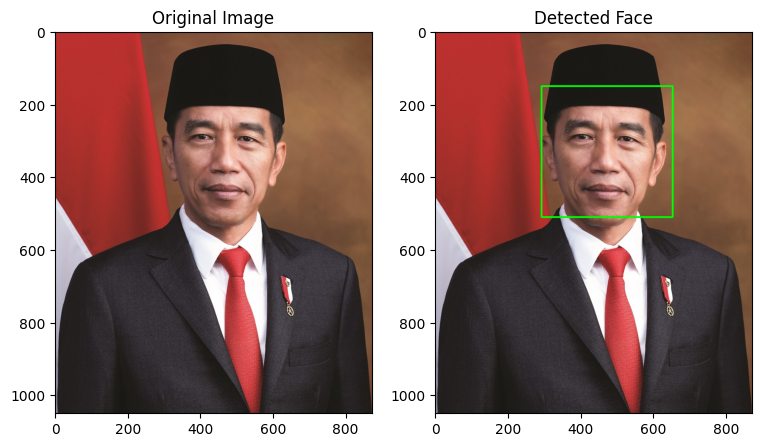

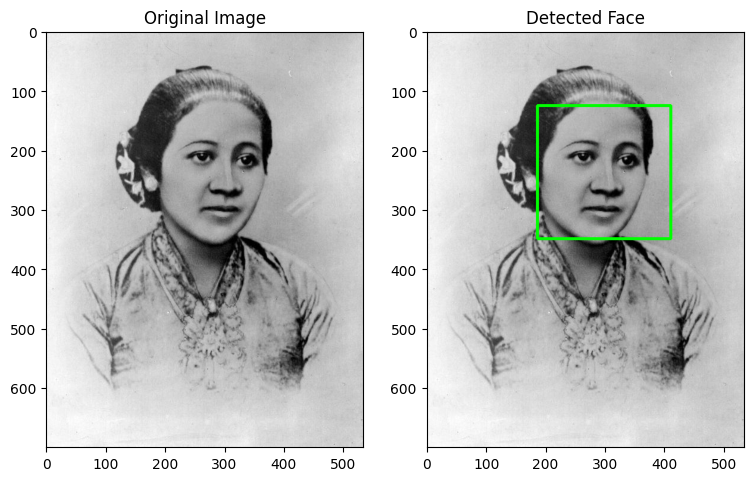

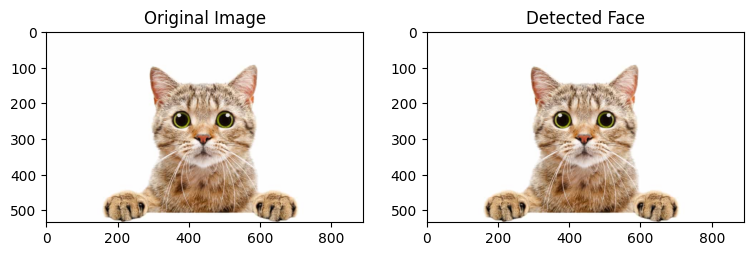

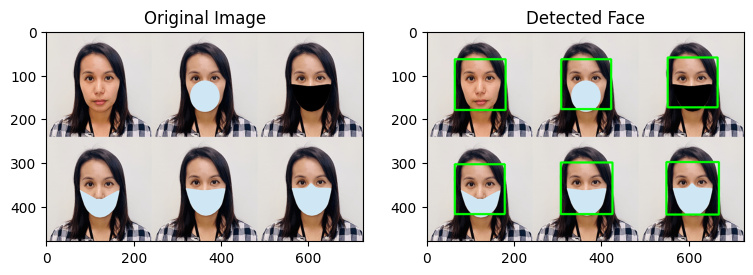

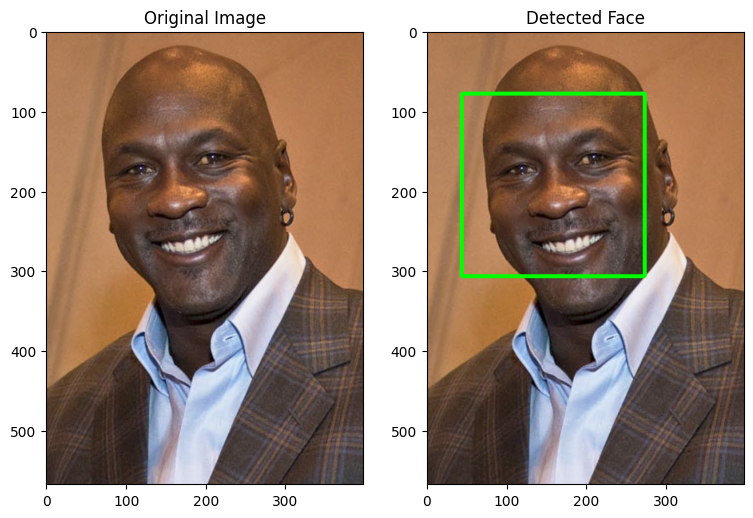

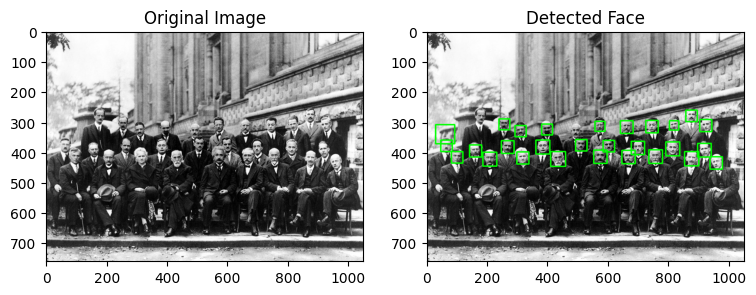

In [ ]:
def face_detection(image_path, cascade_path):
  klasifikasi_wajah = cv2.CascadeClassifier(cascade_path)
  img_rgb = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
  img_copy = img_rgb.copy()

  wajah = klasifikasi_wajah.detectMultiScale(img_copy)

  # melakukan deteksi wajah
  for (x, y, w, h) in wajah:
      cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 4)

  plt.figure(figsize=(9, 8))
  plt.subplot(121), plt.imshow(img_rgb), plt.title('Original Image')
  plt.subplot(122), plt.imshow(img_copy), plt.title('Detected Face')


image_paths = [
    '/content/drive/MyDrive/Images/facedet/jokowi.jpg',
    '/content/drive/MyDrive/Images/facedet/kartini.jpg',
    '/content/drive/MyDrive/Images/facedet/kucing.jpg',
    '/content/drive/MyDrive/Images/facedet/mask.png',
    '/content/drive/MyDrive/Images/facedet/mjordan.jpg',
    '/content/drive/MyDrive/Images/facedet/solvayconf.jpg',
]

for file in image_paths:
  image = cv2.imread(file)
  cascade_file = '/content/drive/MyDrive/Images/facedet/haarcascade_frontalface_alt.xml'
  face_detection(image,cascade_file)


3. Melakukan deteksi wajah kucing

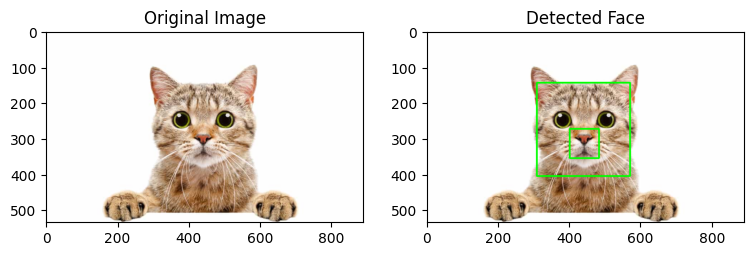

In [ ]:
mpus = cv2.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
cascade_mpus = '/content/drive/MyDrive/Images/facedet/haarcascade_frontalcatface.xml'
face_detection(mpus,cascade_mpus)

4. Cobakan juga untuk eyes detection.

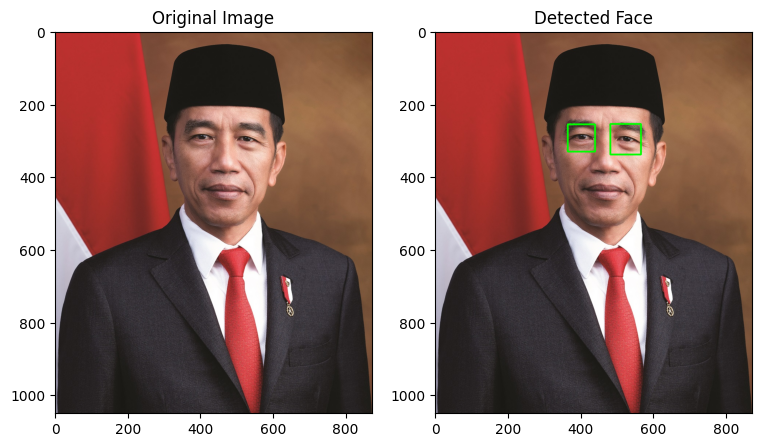

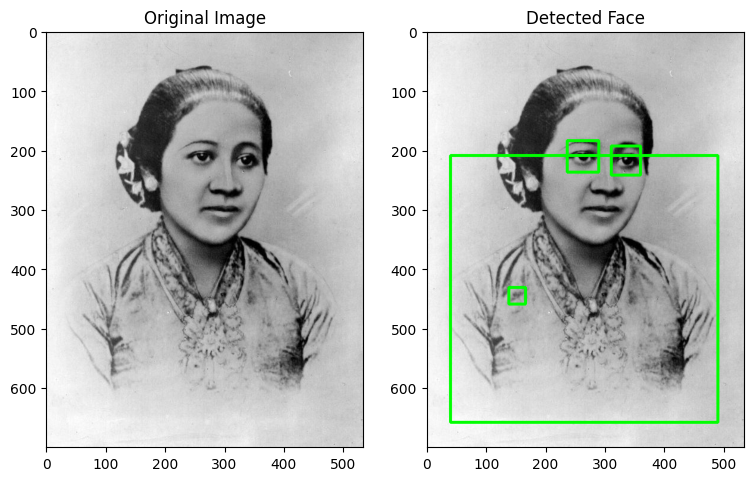

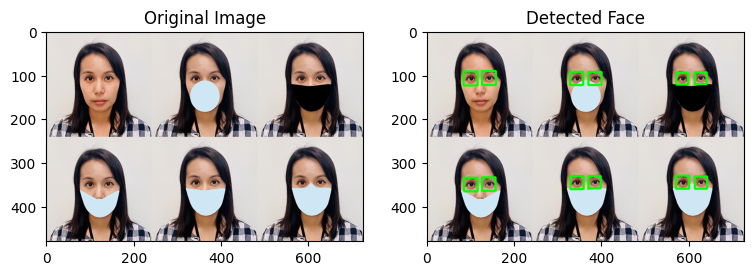

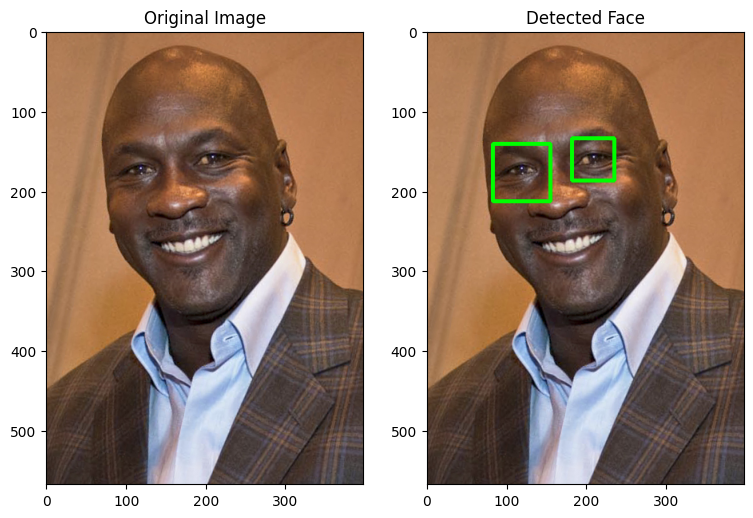

In [ ]:
image_paths = [
    '/content/drive/MyDrive/Images/facedet/jokowi.jpg',
    '/content/drive/MyDrive/Images/facedet/kartini.jpg',
    '/content/drive/MyDrive/Images/facedet/mask.png',
    '/content/drive/MyDrive/Images/facedet/mjordan.jpg',
]

for file in image_paths:
  image = cv2.imread(file)
  cascade_eye = '/content/drive/MyDrive/Images/facedet/haarcascade_eye.xml'
  face_detection(image,cascade_eye)


5. Melakukan Face Tracking menggunakan Google Colab.

In [15]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


Helper Functions

In [16]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Haar Cascade Classifier

In [17]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

Webcam Images

In [18]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


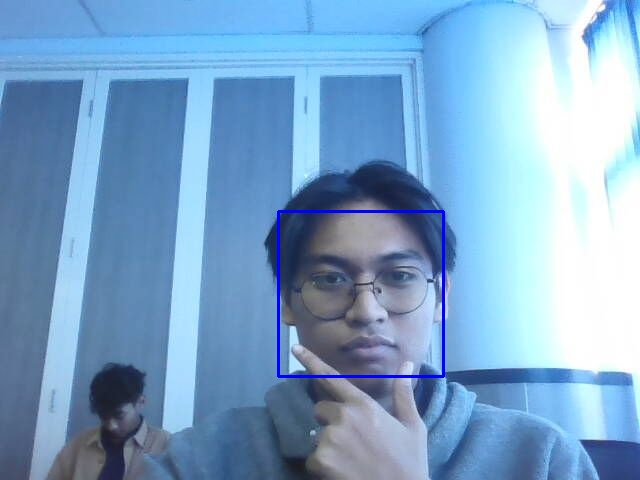

In [20]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

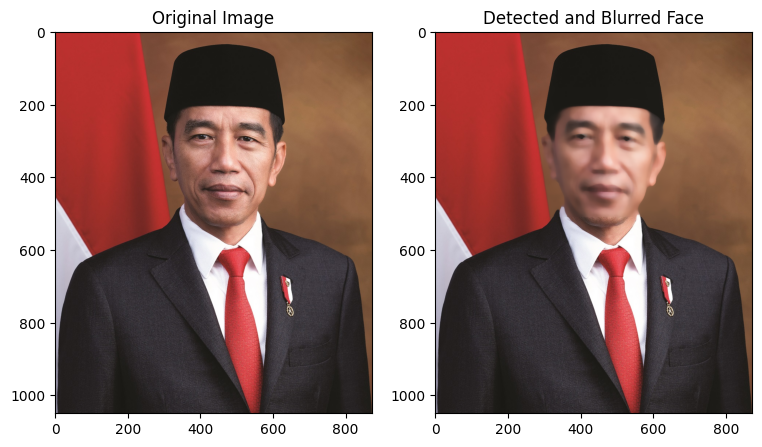

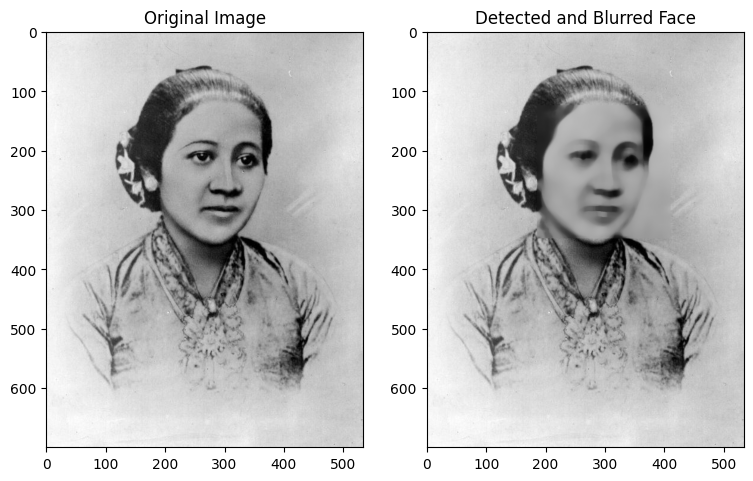

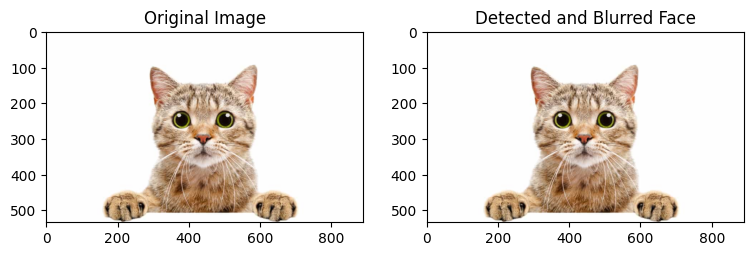

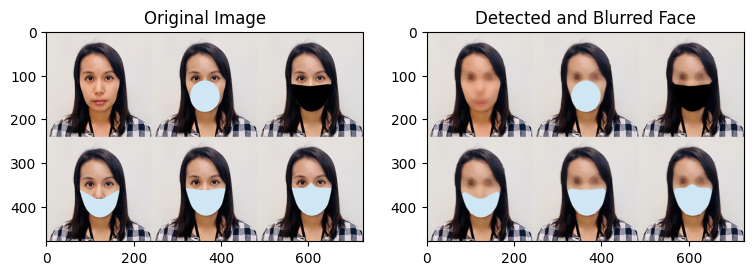

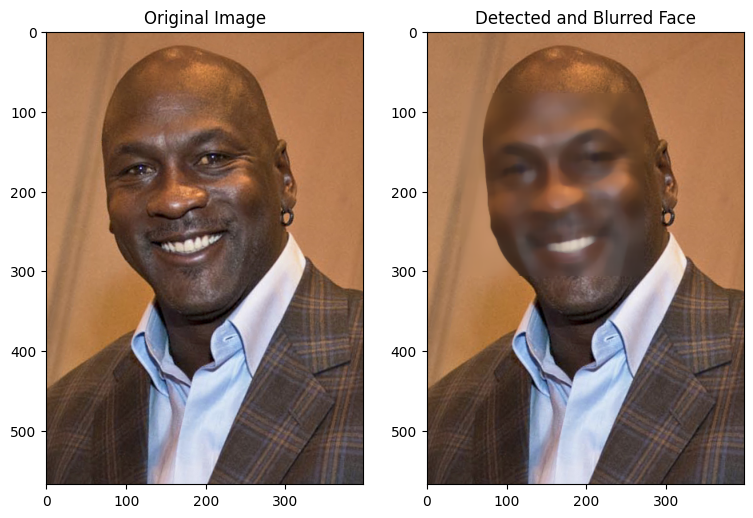

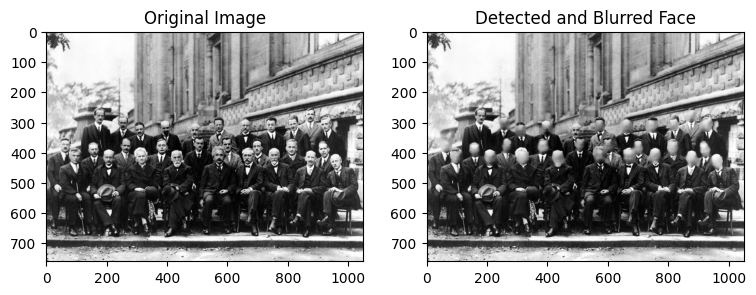

In [21]:
import cv2
import os
import matplotlib.pyplot as plt

def blurface_detection(image_path, cascade_path):
    klasifikasi_wajah = cv2.CascadeClassifier(cascade_path)
    img_rgb = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
    img_copy = img_rgb.copy()

    wajah = klasifikasi_wajah.detectMultiScale(img_copy)

    # melakukan deteksi wajah
    for (x, y, w, h) in wajah:
        # Mendapatkan area wajah
        face_roi = img_copy[y:y+h, x:x+w]

        # Melakukan blurring pada area wajah
        face_roi = cv2.medianBlur(face_roi, 15)

        # Menempatkan wajah yang sudah di-blur ke dalam citra asli
        img_copy[y:y+h, x:x+w] = face_roi

        # # Menampilkan kotak deteksi wajah
        # cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 4)

    plt.figure(figsize=(9, 8))
    plt.subplot(121), plt.imshow(img_rgb), plt.title('Original Image')
    plt.subplot(122), plt.imshow(img_copy), plt.title('Detected and Blurred Face')

image_paths = [
    '/content/drive/MyDrive/Images/facedet/jokowi.jpg',
    '/content/drive/MyDrive/Images/facedet/kartini.jpg',
    '/content/drive/MyDrive/Images/facedet/kucing.jpg',
    '/content/drive/MyDrive/Images/facedet/mask.png',
    '/content/drive/MyDrive/Images/facedet/mjordan.jpg',
    '/content/drive/MyDrive/Images/facedet/solvayconf.jpg',
]

for file in image_paths:
    image = cv2.imread(file)
    cascade_file = '/content/drive/MyDrive/Images/facedet/haarcascade_frontalface_alt.xml'
    blurface_detection(image, cascade_file)

plt.show()


7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

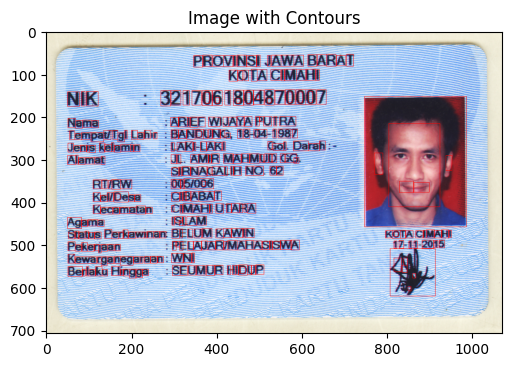

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Baca gambar KTP
ktp = cv2.imread('/content/drive/MyDrive/Images/ktp_more/ktp2.png')

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the eroded image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Create a subplot with 2 rows and 3 columns
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')

plt.show()


8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

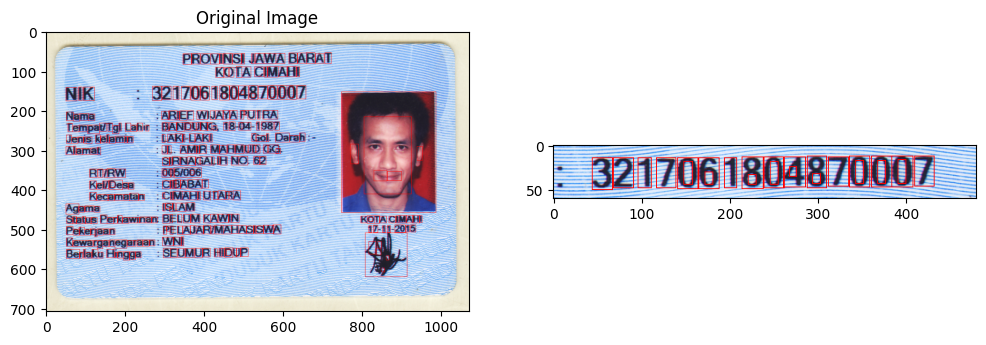

In [32]:
import cv2
import matplotlib.pyplot as plt

def cutting(image, x, y, width, height):
    # Crop the region of interest from the image
    hasil = image[y:y+height, x:x+width]

    return hasil

img = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
img_copy = img.copy()

# Tentukan koordinat untuk crop
x, y, width, height = 225, 125, 480, 60

img_crop = cutting(contour_image, x, y, width, height)

img_rgb1 = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)


# Tampilkan gambar asli
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_rgb1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Tampilkan hasil cropping
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))

plt.show()

9. Menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9.

In [ ]:
from tqdm import tqdm
import os
import tqdm
import cv2
import random
import numpy as np
import pickle


# Direktori data training
DATADIR = "p"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR)
      new_array = cv2.resize(img_array, (width, height))
      training_data.append([new_array, class_number])
    except Exception as e:
      pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 3)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()